# Analyze accuracies and importances from iRF-CV

The purpose of this code is to find and import all predicted, true values and importances from each foldset in many iRF-CV. This script also calculate some basic accuracy metrics.

Run from [gpfs/alpine/syb105/proj-shared/Personal/noshayjm/projects/seed/e.coli/iRF.runs.september2022/00_analyze_data]

In [2]:
# Import libraries
#install.packages("devtools")
#devtools::install_github("sfirke/janitor")
#install.packages("janitor")

require(tidyverse)
require(janitor)

Loading required package: tidyverse

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: janitor


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [3]:
# Find true y file paths
true_y_files = list.files('../', pattern = '*Y_test_noSampleIDs.txt', recursive = T) %>% 
    # Add missing portion of the path
    paste0('../', .) %>%
    # Sort files (this is very important since I will bind columns later based on this order)
    sort()

In [4]:
# Find pred y files
pred_y_files = list.files('../', pattern = '*.prediction', recursive = T) %>%
    # Add missing portion of the path
    paste0('../', .) %>%
    # Sort files (this is very important since I will bind columns later based on this order)    
    sort()

The following code take the whole list of true file paths and apply it iteratively to `read_tsv` function using `map` function (`map` is basically a for loop). The `id` argument in the `read_tsv` function adds the whole path plus filename to the imported dataframe. This is important because I will use this to extract fold and set number, as well as model run name later.


In [5]:
# import true y files
true_y = suppressMessages(map(true_y_files, ~read_tsv(., id = 'id'))) %>%
    bind_rows()

In [6]:
# import pred y files
pred_y = suppressMessages(map(pred_y_files, ~read_tsv(., id = 'id'))) %>%
    bind_rows()

The following code takes the previous results and clean the previous dataframe. The code assumes the run name is encoded in the folder you have your results.

In [7]:
# clean true Ys table
true_y_final = true_y %>%
    # Extract fold, set and run name
    mutate(fold = str_extract(id, 'fold[0-9]'), 
           set = str_extract(id, 'Set[0-9]'), 
           # modify or delete this part of the code depending on your setup
           run_name = str_extract(id, '[0-9][0-9]\\D+')) %>%
    # fix run name
    mutate(run_name = str_remove_all(run_name, '[0-9][0-9]_|/')) %>%
    # drop id column
    select(-id) %>%
    # fix names
    clean_names() %>%
    print()

# A tibble: 6,070,200 × 4
   cut_score fold  set   run_name                      
       <dbl> <chr> <chr> <chr>                         
 1     33.0  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 2     31.5  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 3      3.98 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 4     25.1  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 5     31.4  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 6     31.2  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 7     27.5  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 8     26.6  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 9     31.8  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
10     36.0  fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
# … with 6,070,190 more rows


In [8]:
# clean predicted Ys table
pred_y_final = pred_y %>%
    # Extract fold, set and run name
    mutate(fold = str_extract(id, 'fold[0-9]'), 
           set = str_extract(id, 'Set[0-9]'), 
           # modify or delete this part of the code depending on your setup
           run_name = str_extract(id, '[0-9][0-9]\\D+')) %>%
    # fix run name
    mutate(run_name = str_remove_all(run_name, '[0-9][0-9]_|/')) %>%
    # drop id column
    select(-id) %>%
    # fix names
    clean_names() %>%
    print()

# A tibble: 6,070,200 × 4
   predictions fold  set   run_name                      
         <dbl> <chr> <chr> <chr>                         
 1        24.1 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 2        26.9 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 3        25.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 4        26.5 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 5        24.1 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 6        26.9 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 7        26.4 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 8        25.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 9        24.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
10        26.3 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
# … with 6,070,190 more rows


In [9]:
# Bind data in one dataframe
pred = true_y_final %>%
    # CRITICAL, model fold and set should be in the same order for test and predicted values
    # select only your Y vector (change name to match yours)
    select(cut_score) %>%
    # Bind cols to predicted Ys
    bind_cols(pred_y_final) %>%
    # Visualize results
    print()

# A tibble: 6,070,200 × 5
   cut_score predictions fold  set   run_name                      
       <dbl>       <dbl> <chr> <chr> <chr>                         
 1     33.0         24.1 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 2     31.5         26.9 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 3      3.98        25.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 4     25.1         26.5 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 5     31.4         24.1 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 6     31.2         26.9 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 7     27.5         26.4 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 8     26.6         25.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
 9     31.8         24.2 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
10     36.0         26.3 fold0 Set0  Ecoli.rawcut.scorefoldRunsfold
# … with 6,070,190 more rows


In [10]:
# fix column names
pred2 = pred %>%
    # change column names to something more generic
    rename(true_val = cut_score, pred_val = predictions) %>%
    # Reorder columns
    select(run_name, fold, set, true_val, pred_val) %>%
    # Visualize results
    print()

# A tibble: 6,070,200 × 5
   run_name                       fold  set   true_val pred_val
   <chr>                          <chr> <chr>    <dbl>    <dbl>
 1 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     33.0      24.1
 2 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.5      26.9
 3 Ecoli.rawcut.scorefoldRunsfold fold0 Set0      3.98     25.2
 4 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     25.1      26.5
 5 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.4      24.1
 6 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.2      26.9
 7 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     27.5      26.4
 8 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     26.6      25.2
 9 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.8      24.2
10 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     36.0      26.3
# … with 6,070,190 more rows


In [11]:
# calculate mean by fold and set
pred3 = pred2 %>%
    # group data
    group_by(run_name, fold, set) %>%
    # calculate mean and median
    mutate(mean = mean(true_val), median = median(true_val)) %>%
    # visualize results
    print()

# A tibble: 6,070,200 × 7
# Groups:   run_name, fold, set [750]
   run_name                       fold  set   true_val pred_val  mean median
   <chr>                          <chr> <chr>    <dbl>    <dbl> <dbl>  <dbl>
 1 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     33.0      24.1  24.7   27.3
 2 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.5      26.9  24.7   27.3
 3 Ecoli.rawcut.scorefoldRunsfold fold0 Set0      3.98     25.2  24.7   27.3
 4 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     25.1      26.5  24.7   27.3
 5 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.4      24.1  24.7   27.3
 6 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.2      26.9  24.7   27.3
 7 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     27.5      26.4  24.7   27.3
 8 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     26.6      25.2  24.7   27.3
 9 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     31.8      24.2  24.7   27.3
10 Ecoli.rawcut.scorefoldRunsfold fold0 Set0     36.0      26.3  24.7   27.3
# … with 6,0

I will use mean and median of true y values to estimate the total variance. This will be use later to estimate mean square error (`MSE`) and variance explained (`r2`).

In [12]:
# Calculate residuals
pred4 = pred3 %>%
    # Calculate mean, median and iRF residuals
    mutate(mean_res = true_val - mean,
          median_res = true_val - median,
          irf_res = true_val - pred_val) %>%
    # visualize results
    print()

# A tibble: 6,070,200 × 10
# Groups:   run_name, fold, set [750]
   run_name     fold  set   true_…¹ pred_…²  mean median mean_…³ media…⁴ irf_res
   <chr>        <chr> <chr>   <dbl>   <dbl> <dbl>  <dbl>   <dbl>   <dbl>   <dbl>
 1 Ecoli.rawcu… fold0 Set0    33.0     24.1  24.7   27.3   8.30    5.66     8.87
 2 Ecoli.rawcu… fold0 Set0    31.5     26.9  24.7   27.3   6.83    4.19     4.64
 3 Ecoli.rawcu… fold0 Set0     3.98    25.2  24.7   27.3 -20.7   -23.3    -21.2 
 4 Ecoli.rawcu… fold0 Set0    25.1     26.5  24.7   27.3   0.413  -2.23    -1.40
 5 Ecoli.rawcu… fold0 Set0    31.4     24.1  24.7   27.3   6.72    4.08     7.33
 6 Ecoli.rawcu… fold0 Set0    31.2     26.9  24.7   27.3   6.54    3.90     4.35
 7 Ecoli.rawcu… fold0 Set0    27.5     26.4  24.7   27.3   2.79    0.145    1.01
 8 Ecoli.rawcu… fold0 Set0    26.6     25.2  24.7   27.3   1.93   -0.715    1.43
 9 Ecoli.rawcu… fold0 Set0    31.8     24.2  24.7   27.3   7.15    4.51     7.58
10 Ecoli.rawcu… fold0 Set0    36.0     26.3 

In [13]:
# Calculate accuracy metrics
accuracies = pred4 %>%
    # calculate squared errors for mean, median and iRF residuals
    mutate(irf_res_sqr = irf_res^2, 
           mean_res_sqr = mean_res^2, 
           median_res_sqr = median_res^2) %>%
    # group data
    group_by(run_name, fold, set) %>%
    # calcualte MSE
    summarize(irf_mse = mean(irf_res_sqr), 
              mean_mse = mean(mean_res_sqr), 
              median_mse = mean(median_res_sqr)) %>%
    # Calculate variance explained using mean and median as base model
    mutate(r2 = 1-(irf_mse/mean_mse), 
           r2_median = 1-(irf_mse/median_mse)) %>%
    # visualize results
    print()


`summarise()` has grouped output by 'run_name', 'fold'. You can override using
the `.groups` argument.


# A tibble: 750 × 8
# Groups:   run_name, fold [150]
   run_name                    fold  set   irf_mse mean_…¹ media…²    r2 r2_me…³
   <chr>                       <chr> <chr>   <dbl>   <dbl>   <dbl> <dbl>   <dbl>
 1 Ecoli.bpcut.scorefoldRunsf… fold0 Set0    100.     113.    120. 0.115   0.167
 2 Ecoli.bpcut.scorefoldRunsf… fold0 Set1     99.0    110.    117. 0.102   0.156
 3 Ecoli.bpcut.scorefoldRunsf… fold0 Set2     98.7    111.    118. 0.112   0.167
 4 Ecoli.bpcut.scorefoldRunsf… fold0 Set3     98.2    110.    116. 0.104   0.155
 5 Ecoli.bpcut.scorefoldRunsf… fold0 Set4     96.5    108.    115. 0.108   0.158
 6 Ecoli.bpcut.scorefoldRunsf… fold1 Set0     98.7    111.    118. 0.108   0.161
 7 Ecoli.bpcut.scorefoldRunsf… fold1 Set1     99.1    111.    118. 0.104   0.160
 8 Ecoli.bpcut.scorefoldRunsf… fold1 Set2     98.0    110.    117. 0.112   0.163
 9 Ecoli.bpcut.scorefoldRunsf… fold1 Set3     99.5    112.    119. 0.109   0.160
10 Ecoli.bpcut.scorefoldRunsf… fold1 Set4     97.1    10

In [14]:
# convert accuracies to long format for easy plotting
accuracies_long = accuracies %>%
    gather(key = 'variable', value = 'value', -run_name:-set)

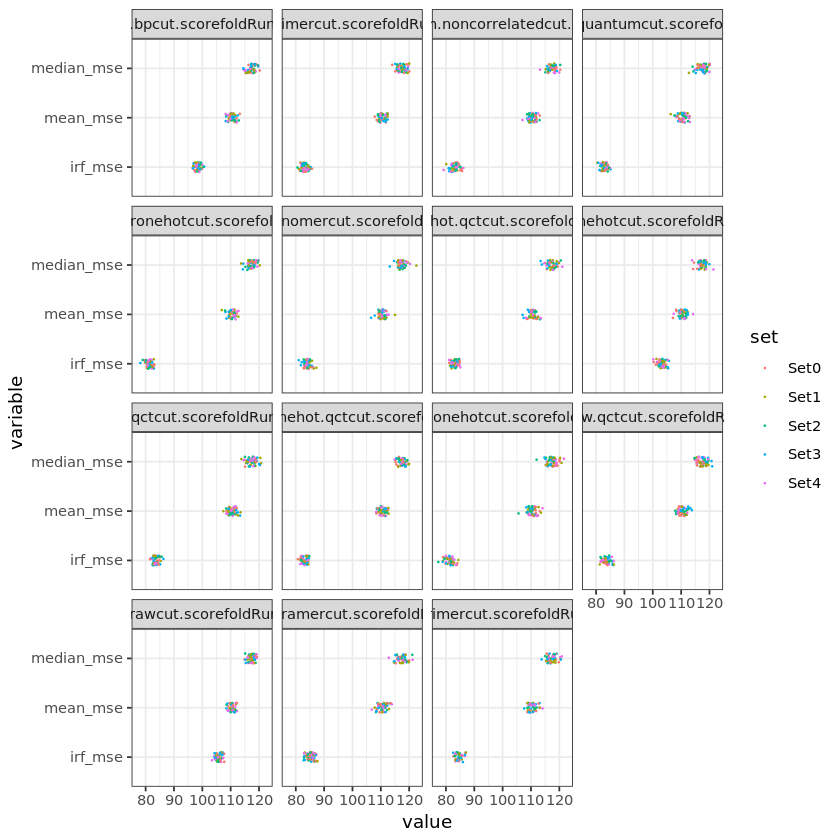

In [15]:
# plot data
accuracies_long %>%
    # Fix names for easier visualization
    mutate(run_name = str_wrap(str_replace_all(run_name, '_', ' '), width = 20)) %>%
    # remove r2 and r2_median
    filter(!variable %in% c('r2', 'r2_median')) %>%
    ggplot(aes(y = variable, x = value, color = set))+
    geom_jitter(height = .1, size=0.1)+
    #geom_boxplot(width = .1, position = position_dodge(.9), fill = '#00afb9')+
    facet_wrap(~run_name)+
    # set theme
    theme_bw()

# save plot
ggsave('mse_all_models_points.png', width = 6, height = 6)

In the plot above is critical that you DO NOT see any pattern in the points distribution. Foldsets should scatter randomly along x axis.

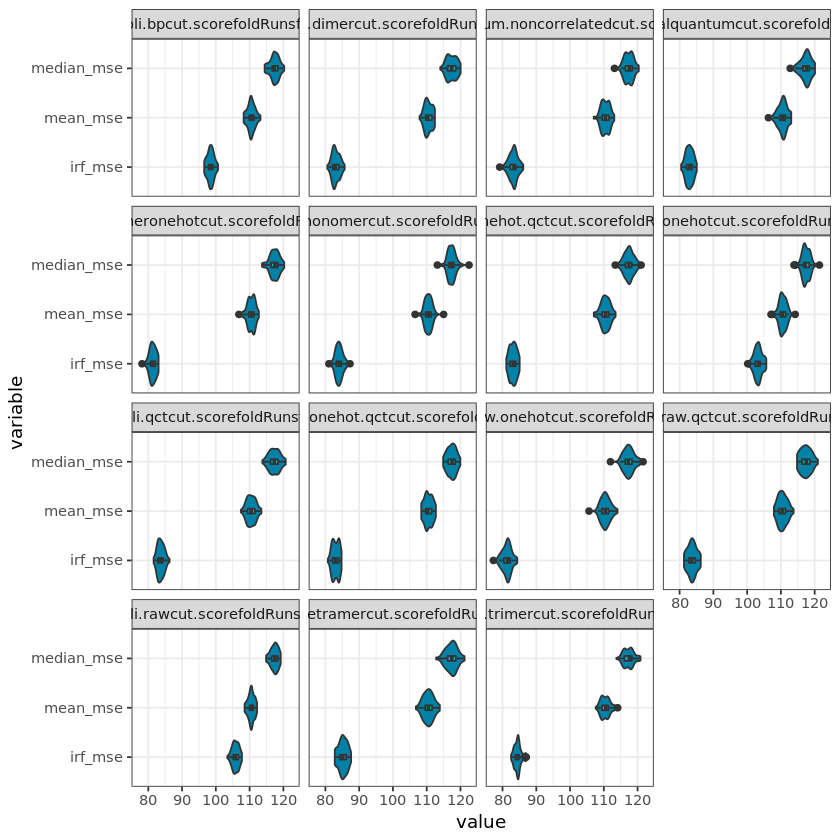

In [16]:
# plot data
accuracies_long %>%
    # Fix names for easier visualization
    mutate(run_name = str_wrap(str_replace_all(run_name, '_', ' '), width = 20)) %>%
    # remove r2 and r2_median
    filter(!variable %in% c('r2', 'r2_median')) %>%
    ggplot(aes(y = variable, x = value))+
    geom_violin(fill = '#0081a7')+
    geom_boxplot(width = .1, position = position_dodge(.9), fill = '#00afb9')+
    facet_wrap(~run_name)+
    theme_bw()

# save plot
ggsave('mse_all_models.png', width = 6, height = 6)

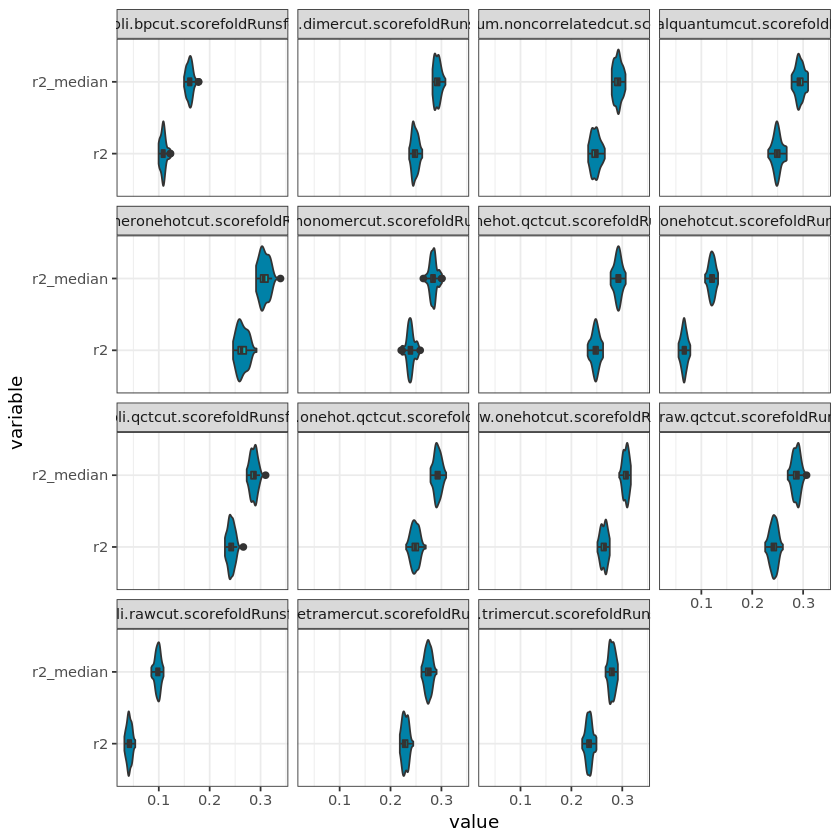

In [17]:
# plot data
accuracies_long %>%
    # Fix names for easier visualization
    mutate(run_name = str_wrap(str_replace_all(run_name, '_', ' '), width = 20)) %>%
    # keep only r2 
    filter(variable %in% c('r2', 'r2_median')) %>%
    ggplot(aes(y = variable, x = value))+
    geom_violin(fill = '#0081a7')+
    geom_boxplot(width = .1, position = position_dodge(.9), fill = '#00afb9')+
    facet_wrap(~run_name)+
    theme_bw()

# save plot
ggsave('r2_all_models.png', width = 6, height = 6)

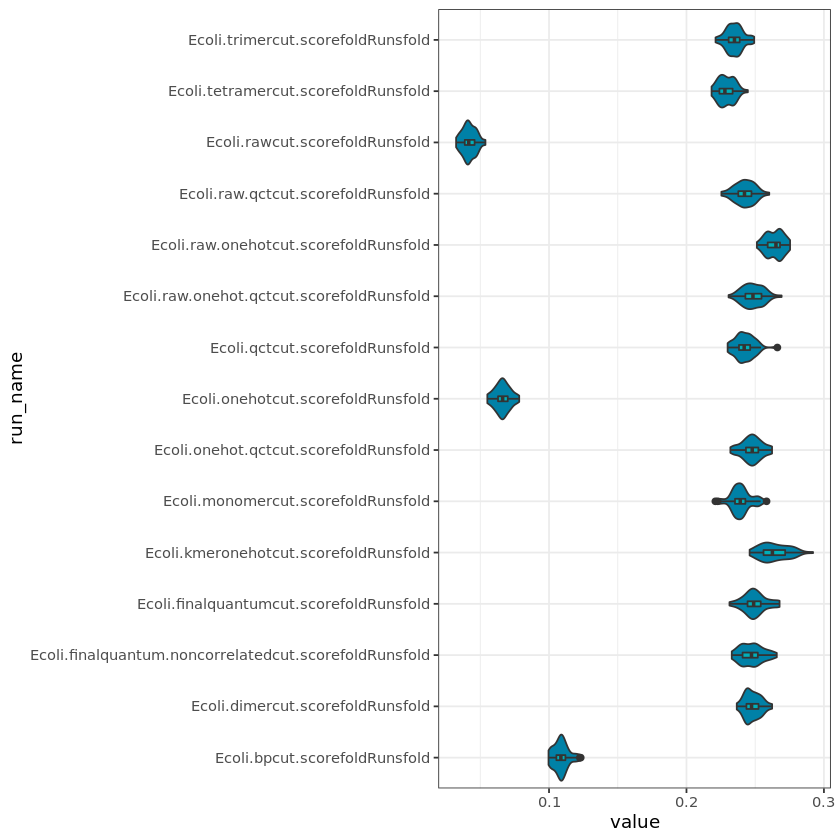

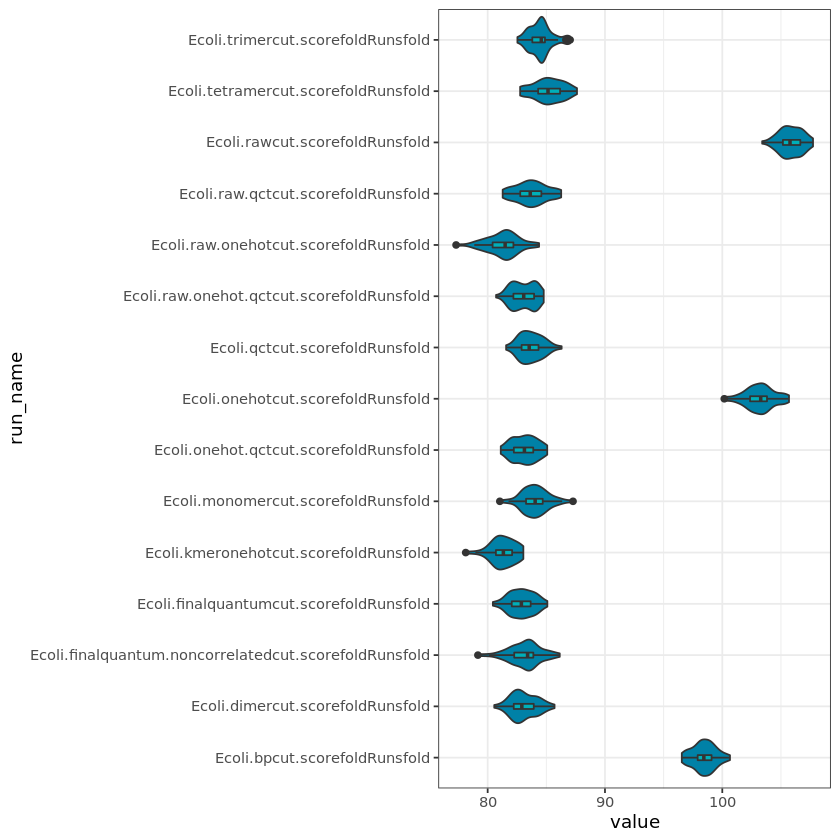

In [18]:
# plot data for all models on same plot
accuracies_long %>%
    # Fix names for easier visualization
    mutate(run_name = str_wrap(str_replace_all(run_name, '_', ' '), width = 20)) %>%
    #mutate(run_order = factor(accuracies_long$run_name, levels = c("Ecoli.raw.scorefoldRunsfold", "Ecoli.onehot.scorefoldRunsfold", "Ecoli.kmeronehot.scorefoldRunsfold", "Ecoli.monomer.scorefoldRunsfold", "Ecoli.bp.scorefoldRunsfold", "Ecoli.dimer.scorefoldRunsfold", "Ecoli.trimer.scorefoldRunsfold", "Ecoli.tetramer.scorefoldRunsfold", "Ecoli.qct.scorefoldRunsfold", "Ecoli.raw.onehot.scorefoldRunsfold", "Ecoli.raw.qct.scorefoldRunsfold", "Ecoli.onehot.qct.scorefoldRunsfold", "Ecoli.raw.onehot.qct.scorefoldRunsfold", "Ecoli.finalquantum.scorefoldRunsfold", "Ecoli.finalquantum.noncorrelated.scorefoldRunsfold")))%>%
    # specify order of models
    # keep only r2 
    filter(variable %in% c('r2')) %>%
    ggplot(aes(y=run_name, x=value))+
    geom_violin(fill = '#0081a7')+
    geom_boxplot(width = .1, position = position_dodge(.9), fill = '#00afb9')+
    theme_bw()

# save plot
ggsave('r2_all_models_compare.png', width = 6, height = 6)

# plot data for all models on same plot
accuracies_long %>%
    # Fix names for easier visualization
    mutate(run_name = str_wrap(str_replace_all(run_name, '_', ' '), width = 20)) %>%
    #mutate(run_order = factor(accuracies_long$run_name, levels = c("Ecoli.raw.scorefoldRunsfold", "Ecoli.onehot.scorefoldRunsfold", "Ecoli.kmeronehot.scorefoldRunsfold", "Ecoli.monomer.scorefoldRunsfold", "Ecoli.bp.scorefoldRunsfold", "Ecoli.dimer.scorefoldRunsfold", "Ecoli.trimer.scorefoldRunsfold", "Ecoli.tetramer.scorefoldRunsfold", "Ecoli.qct.scorefoldRunsfold", "Ecoli.raw.onehot.scorefoldRunsfold", "Ecoli.raw.qct.scorefoldRunsfold", "Ecoli.onehot.qct.scorefoldRunsfold", "Ecoli.raw.onehot.qct.scorefoldRunsfold", "Ecoli.finalquantum.scorefoldRunsfold", "Ecoli.finalquantum.noncorrelated.scorefoldRunsfold")))%>%
    # specify order of models
    # keep only r2 
    filter(variable %in% c('irf_mse')) %>%
    ggplot(aes(y=run_name, x=value))+
    geom_violin(fill = '#0081a7')+
    geom_boxplot(width = .1, position = position_dodge(.9), fill = '#00afb9')+
    theme_bw()

# save plot
ggsave('mse_all_models_compare.png', width = 6, height = 6)

In [19]:
# get final accuracy table
accuracies_long %>%
    # group data
    group_by(run_name, variable) %>%
    # calculate mean value
    summarize(avg = mean(value)) %>%
    # pivot accuracy metrics into columns
    spread(key = variable, value = avg) %>%
    # remove useless columns
    select(-mean_mse, -median_mse) %>%
    # sort models by variance explained
    arrange(desc(r2))

`summarise()` has grouped output by 'run_name'. You can override using the
`.groups` argument.


run_name,irf_mse,r2,r2_median
<chr>,<dbl>,<dbl>,<dbl>
Ecoli.raw.onehotcut.scorefoldRunsfold,81.30888,0.26416674,0.30729778
Ecoli.kmeronehotcut.scorefoldRunsfold,81.30281,0.26411080,0.30737940
Ecoli.finalquantumcut.scorefoldRunsfold,82.90455,0.24964320,0.29366536
Ecoli.raw.onehot.qctcut.scorefoldRunsfold,83.05280,0.24834625,0.29248490
Ecoli.dimercut.scorefoldRunsfold,83.07898,0.24814611,0.29225301
Ecoli.onehot.qctcut.scorefoldRunsfold,83.12644,0.24765725,0.29185839
Ecoli.finalquantum.noncorrelatedcut.scorefoldRunsfold,83.16143,0.24739545,0.29161243
Ecoli.qctcut.scorefoldRunsfold,83.69117,0.24253719,0.28695294
Ecoli.raw.qctcut.scorefoldRunsfold,83.71691,0.24236200,0.28688196


# Importances

In [20]:
# Import and sort true y files
importance_files = list.files('../', pattern = '*.importance4', recursive = T) %>%
    paste0('../', .) %>%
    sort()

In [21]:
# import true y files
importances = suppressMessages(map(importance_files, ~read_tsv(., id = 'id', col_names = 'importance'))) %>%
    bind_rows()

In [22]:
# Calculate normalized importance
norm_imp = importances %>%
# Extract fold, set and run name
    mutate(fold = str_extract(id, 'fold[0-9]'), 
           set = str_extract(id, 'Set[0-9]'), 
           run_name = str_extract(id, '[0-9][0-9]\\D+')) %>%
    # fix run name
    mutate(run_name = str_remove_all(run_name, '[0-9][0-9]_|/')) %>%
    # drop id column
    select(-id) %>%
    # fix names
    clean_names() %>%
    # remove fold and set with NAs
    filter(!is.na(fold)) %>%
    # fix importances
    separate(importance, into = c('feature', 'importance'), sep = ': ') %>%
    # Coherce importance to numeric
    mutate(importance = as.numeric(importance)) %>%
    # group by 
    group_by(run_name, fold, set) %>%
    # total importance
    mutate(total_importance = sum(importance)) %>%
    # calculate nomralized importance
    mutate(normalized_importance = importance/total_importance) 

In [23]:
# calculate average of normalized importance
norm_imp_summary = norm_imp %>%
    # group data
    group_by(run_name, feature) %>%
    # calculate avg
    summarize(normalized_importance_avg = mean(normalized_importance)) %>%
    # fix names
    mutate(feature = str_wrap(str_replace_all(feature, '_', ' '), width = 30)) %>%
    # Visualize results
    print()

`summarise()` has grouped output by 'run_name'. You can override using the
`.groups` argument.


# A tibble: 37,562 × 3
# Groups:   run_name [15]
   run_name                      feature                     normalized_import…¹
   <chr>                         <chr>                                     <dbl>
 1 Ecoli.bpcut.scorefoldRunsfold p10basepair.Hbond.energyraw              0.0125
 2 Ecoli.bpcut.scorefoldRunsfold p10basepair.Hlgap.eVEraw                 0.0125
 3 Ecoli.bpcut.scorefoldRunsfold p10basepair.No.electronsraw              0     
 4 Ecoli.bpcut.scorefoldRunsfold p11basepair.Hbond.energyraw              0.0197
 5 Ecoli.bpcut.scorefoldRunsfold p11basepair.Hlgap.eVEraw                 0.0199
 6 Ecoli.bpcut.scorefoldRunsfold p11basepair.No.electronsraw              0     
 7 Ecoli.bpcut.scorefoldRunsfold p12basepair.Hbond.energyraw              0.0136
 8 Ecoli.bpcut.scorefoldRunsfold p12basepair.Hlgap.eVEraw                 0.0136
 9 Ecoli.bpcut.scorefoldRunsfold p12basepair.No.electronsraw              0     
10 Ecoli.bpcut.scorefoldRunsfold p13basepair.Hbond.energyraw

In [24]:
# I created this to keep original names for later processing
norm_imp_summary2 = norm_imp %>%
    group_by(run_name, feature) %>%
    summarize(normalized_importance_avg = mean(normalized_importance)) %>%
    print()

`summarise()` has grouped output by 'run_name'. You can override using the
`.groups` argument.


# A tibble: 37,562 × 3
# Groups:   run_name [15]
   run_name                      feature                     normalized_import…¹
   <chr>                         <chr>                                     <dbl>
 1 Ecoli.bpcut.scorefoldRunsfold p10basepair.Hbond.energyraw              0.0125
 2 Ecoli.bpcut.scorefoldRunsfold p10basepair.Hlgap.eVEraw                 0.0125
 3 Ecoli.bpcut.scorefoldRunsfold p10basepair.No.electronsraw              0     
 4 Ecoli.bpcut.scorefoldRunsfold p11basepair.Hbond.energyraw              0.0197
 5 Ecoli.bpcut.scorefoldRunsfold p11basepair.Hlgap.eVEraw                 0.0199
 6 Ecoli.bpcut.scorefoldRunsfold p11basepair.No.electronsraw              0     
 7 Ecoli.bpcut.scorefoldRunsfold p12basepair.Hbond.energyraw              0.0136
 8 Ecoli.bpcut.scorefoldRunsfold p12basepair.Hlgap.eVEraw                 0.0136
 9 Ecoli.bpcut.scorefoldRunsfold p12basepair.No.electronsraw              0     
10 Ecoli.bpcut.scorefoldRunsfold p13basepair.Hbond.energyraw

In [25]:
# Get top 10 features per model
norm_imp_summary %>%
    slice_max(order_by = normalized_importance_avg, n = 10) %>%
    print(n= Inf)

# A tibble: 145 × 3
# Groups:   run_name [15]
    run_name                                              feature        norma…¹
    <chr>                                                 <chr>            <dbl>
  1 Ecoli.bpcut.scorefoldRunsfold                         p20basepair.H…  0.194 
  2 Ecoli.bpcut.scorefoldRunsfold                         p20basepair.H…  0.125 
  3 Ecoli.bpcut.scorefoldRunsfold                         p18basepair.H…  0.0700
  4 Ecoli.bpcut.scorefoldRunsfold                         p18basepair.H…  0.0656
  5 Ecoli.bpcut.scorefoldRunsfold                         p14basepair.H…  0.0207
  6 Ecoli.bpcut.scorefoldRunsfold                         p14basepair.H…  0.0206
  7 Ecoli.bpcut.scorefoldRunsfold                         p11basepair.H…  0.0199
  8 Ecoli.bpcut.scorefoldRunsfold                         p11basepair.H…  0.0197
  9 Ecoli.bpcut.scorefoldRunsfold                         p16basepair.H…  0.0194
 10 Ecoli.bpcut.scorefoldRunsfold                         p16ba

run_name,feature,normalized_importance_avg
<chr>,<chr>,<dbl>
Ecoli.bpcut.scorefoldRunsfold,p10basepair.Hbond.energyraw,0.01247153
Ecoli.bpcut.scorefoldRunsfold,p10basepair.Hlgap.eVEraw,0.01248898
Ecoli.bpcut.scorefoldRunsfold,p10basepair.No.electronsraw,0.00000000
Ecoli.bpcut.scorefoldRunsfold,p11basepair.Hbond.energyraw,0.01969417
Ecoli.bpcut.scorefoldRunsfold,p11basepair.Hlgap.eVEraw,0.01989343
Ecoli.bpcut.scorefoldRunsfold,p11basepair.No.electronsraw,0.00000000


[1] "Ecoli.bpcut.scorefoldRunsfold"                        
 [2] "Ecoli.dimercut.scorefoldRunsfold"                     
 [3] "Ecoli.finalquantum.noncorrelatedcut.scorefoldRunsfold"
 [4] "Ecoli.finalquantumcut.scorefoldRunsfold"              
 [5] "Ecoli.kmeronehotcut.scorefoldRunsfold"                
 [6] "Ecoli.monomercut.scorefoldRunsfold"                   
 [7] "Ecoli.onehot.qctcut.scorefoldRunsfold"                
 [8] "Ecoli.onehotcut.scorefoldRunsfold"                    
 [9] "Ecoli.qctcut.scorefoldRunsfold"                       
[10] "Ecoli.raw.onehot.qctcut.scorefoldRunsfold"            
[11] "Ecoli.raw.onehotcut.scorefoldRunsfold"                
[12] "Ecoli.raw.qctcut.scorefoldRunsfold"                   
[13] "Ecoli.rawcut.scorefoldRunsfold"                       
[14] "Ecoli.tetramercut.scorefoldRunsfold"                  
[15] "Ecoli.trimercut.scorefoldRunsfold"

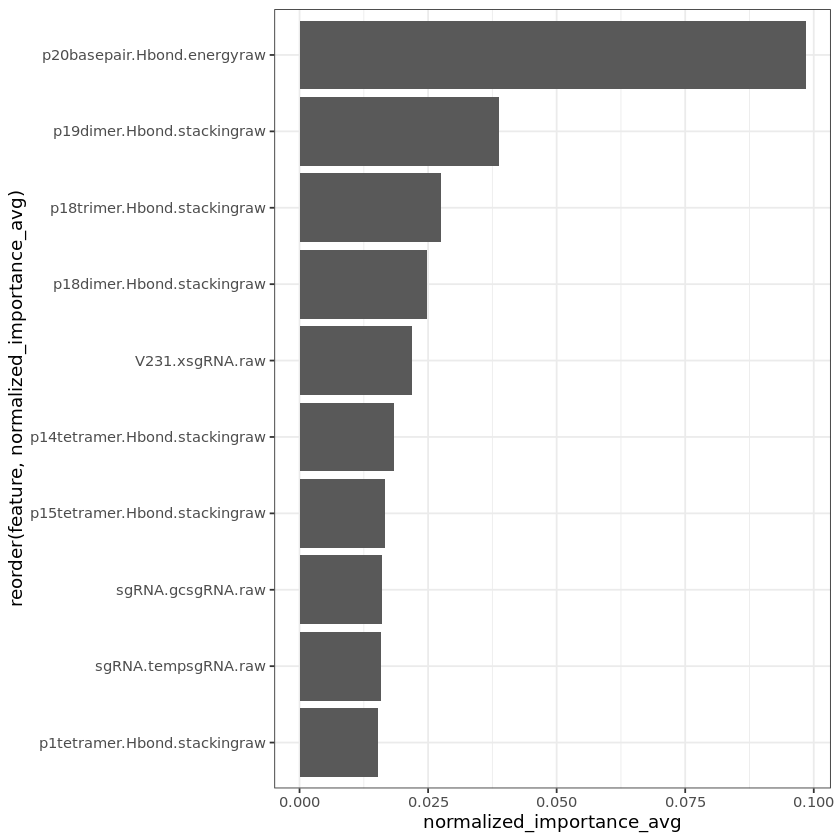

In [36]:
# Plot data
head(norm_imp_summary)
unique(norm_imp_summary$run_name)
norm_imp_summary %>%
    filter(run_name == 'Ecoli.finalquantum.noncorrelatedcut.scorefoldRunsfold') %>%
    slice_max(order_by = normalized_importance_avg, n = 10) %>%
    ggplot(aes(x = normalized_importance_avg, y = reorder(feature, normalized_importance_avg)))+
    geom_col()+
    # facet_wrap(~run_name, scales = 'free')+
    theme_bw()

ggsave('imoprtance_all_features_collapsed_top_10.png', width = 12, height = 12)

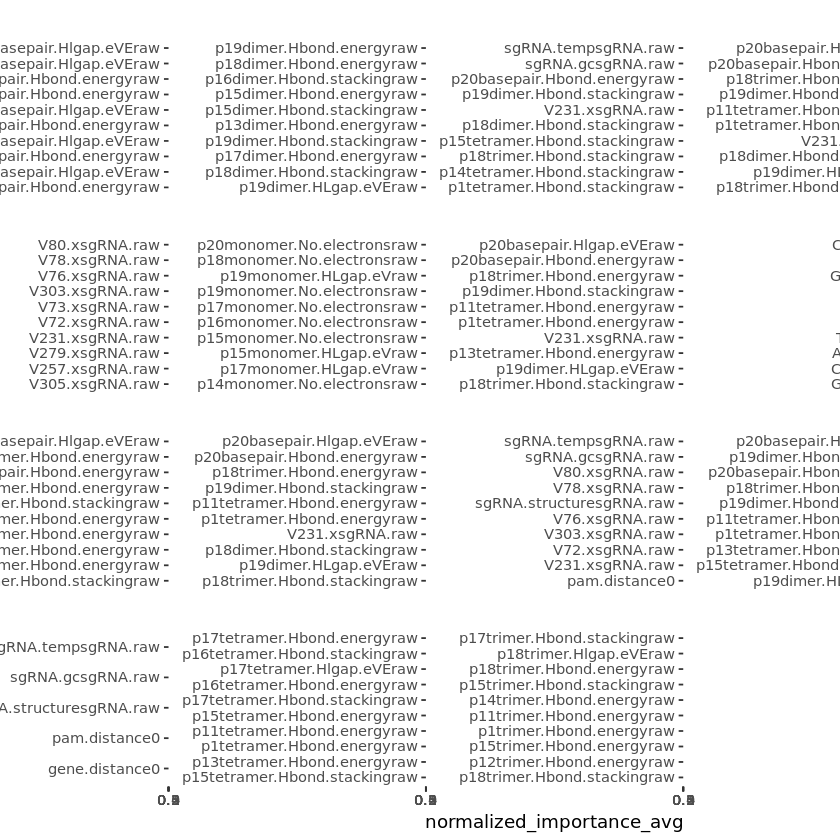

In [27]:
norm_imp_summary %>%
    # filter(run_name == 'all_features_collapsed') %>%
    slice_max(order_by = normalized_importance_avg, n = 10) %>%
    ggplot(aes(x = normalized_importance_avg, y = reorder(feature, normalized_importance_avg)))+
    geom_col()+
    facet_wrap(~run_name, scales = 'free_y')+
    theme_bw()

ggsave('imoprtance_top_10_all_runs.png', width = 12, height = 12)

# Explore trends

This part explore the trends of top 10 features.

In [37]:
top_10_feat = norm_imp_summary2 %>%
    filter(run_name == 'Ecoli.finalquantum.noncorrelatedcut.scorefoldRunsfold') %>%
    slice_max(order_by = normalized_importance_avg, n = 10) %>%
    ungroup() %>%
    distinct(feature) %>%
    pull(feature) %>%
    print()

 [1] "p20basepair.Hbond.energyraw"   "p19dimer.Hbond.stackingraw"   
 [3] "p18trimer.Hbond.stackingraw"   "p18dimer.Hbond.stackingraw"   
 [5] "V231.xsgRNA.raw"               "p14tetramer.Hbond.stackingraw"
 [7] "p15tetramer.Hbond.stackingraw" "sgRNA.gcsgRNA.raw"            
 [9] "sgRNA.tempsgRNA.raw"           "p1tetramer.Hbond.stackingraw" 


In [38]:
# Import x matrix and y vector
x_mat = read_table('../15_Ecoli.finalquantum.noncorrelated/Ecoli.finalquantum.noncorrelated.features.txt')
y_vec = read_table('../15_Ecoli.finalquantum.noncorrelated/Ecoli.finalquantum.score.txt')



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  sgRNAID = col_character()
)
ℹ Use `spec()` for the full column specifications.


── Column specification ────────────────────────────────────────────────────────
cols(
  sgRNAID = col_character(),
  cut.score = col_double()
)



In [41]:
df = x_mat %>%
    # Select top 10 features
    select(all_of(top_10_feat)) %>%
    # Bind to Y vector
    bind_cols(y_vec) %>%
    # remove useless columns
    # select(-FIPS) %>% 
    # convert to long format
    gather(key = 'feature', value = 'predictor') %>%
    # Visualize results
    print()

# A tibble: 485,616 × 2
   feature                     predictor  
   <chr>                       <chr>      
 1 p20basepair.Hbond.energyraw 27.11950899
 2 p20basepair.Hbond.energyraw 27.11950899
 3 p20basepair.Hbond.energyraw 27.11950899
 4 p20basepair.Hbond.energyraw 8.563800343
 5 p20basepair.Hbond.energyraw 8.563800343
 6 p20basepair.Hbond.energyraw 8.563800343
 7 p20basepair.Hbond.energyraw 27.11950899
 8 p20basepair.Hbond.energyraw 8.563800343
 9 p20basepair.Hbond.energyraw 8.563800343
10 p20basepair.Hbond.energyraw 27.11950899
# … with 485,606 more rows


feature,predictor
<chr>,<chr>
p20basepair.Hbond.energyraw,27.11950899
p20basepair.Hbond.energyraw,27.11950899
p20basepair.Hbond.energyraw,27.11950899
p20basepair.Hbond.energyraw,8.563800343
p20basepair.Hbond.energyraw,8.563800343
p20basepair.Hbond.energyraw,8.563800343


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



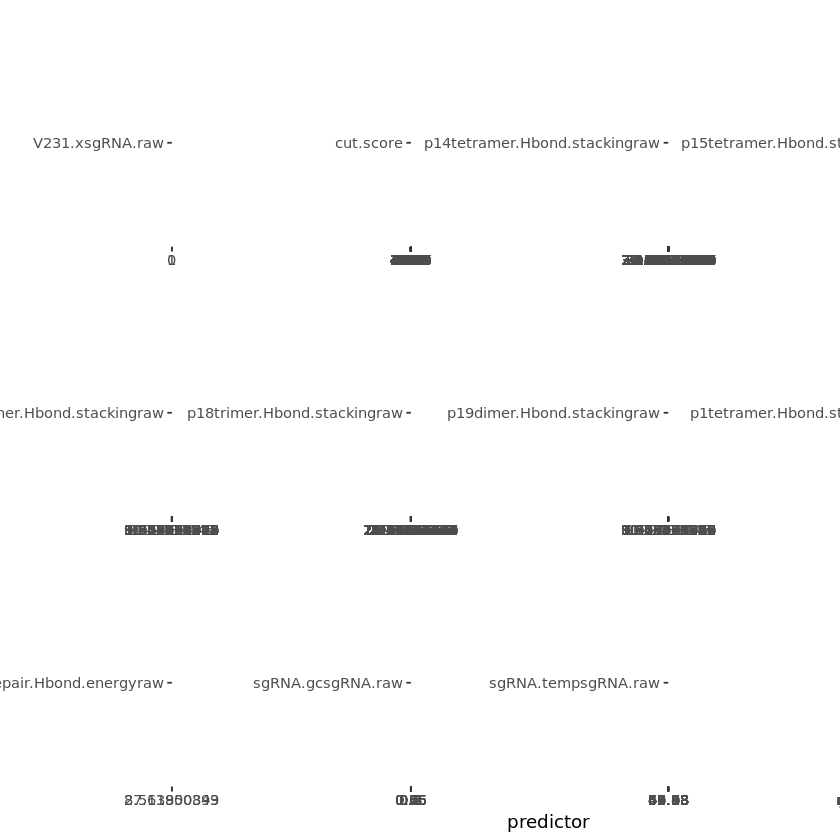

In [44]:
# Visualize trends
head(df)
df %>%
    # fix names
    mutate(feature = str_wrap(str_replace_all(feature, '_', ' '), width = 30)) %>%
    ggplot(aes(x = predictor, 
               y=feature))+
    geom_point(color = '#a663cc')+
    geom_smooth(method = 'lm')+
    facet_wrap(~feature, scales = 'free')+
    theme_bw()

ggsave('trends_top_10_all_runs.png', width = 12, height = 12, dpi = 150)

# Feature Variance

This part explores the variance present in the data matrix for top features

In [ ]:
# For finalquantum.noncorrelated matrix look at variance in scores for experimental data and for predicted output



In [ ]:
# For each feature in finalquantum.noncorrelated matrix look at variance in values